### Linear Regression Using Scipy

In [7]:
%matplotlib inline

In [1]:
x = [5,10,20,8,4,6,12,15]
y = [27,46,73,40,30,28,46,59]

data_list = [tpl for tpl in zip(x,y)]

In [2]:
data_list

[(5, 27), (10, 46), (20, 73), (8, 40), (4, 30), (6, 28), (12, 46), (15, 59)]

In [3]:
import numpy as np

income = []
sales = []
for x,y in sorted(data_list):
    income.append(x)
    sales.append(y)
    
income = np.array(income)
sales = np.array(sales)

In [4]:
income

array([ 4,  5,  6,  8, 10, 12, 15, 20])

In [5]:
sales

array([30, 27, 28, 40, 46, 46, 59, 73])

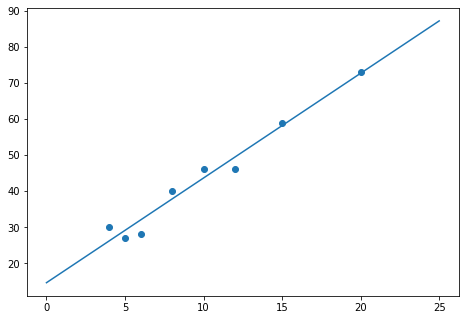

In [8]:
import matplotlib.pyplot as plt
import scipy.stats as stats

fig = plt.figure()

slope, intercept, r_value, p_value, std_err = stats.linregress(income, sales)
x = range(0,26)
y = slope * x + intercept

axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)
axes.scatter(income, sales)
axes.plot(x,y)
plt.show()

#### y-intercept:

In [18]:
intercept

14.577380952380953

#### slope:

In [19]:
slope

2.9047619047619047

In [9]:
y = slope * income + intercept

In [10]:
y

array([26.19642857, 29.10119048, 32.00595238, 37.81547619, 43.625     ,
       49.43452381, 58.14880952, 72.67261905])

#### Prediction at income = 15:

In [21]:
slope * 15 + intercept

58.14880952380952

In [11]:
residual = sales - y

In [12]:
residual

array([ 3.80357143, -2.10119048, -4.00595238,  2.18452381,  2.375     ,
       -3.43452381,  0.85119048,  0.32738095])

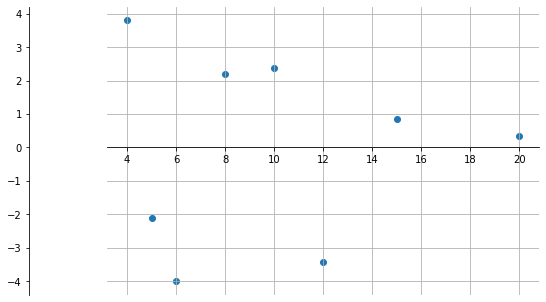

In [13]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

axes.spines['right'].set_color('none')
axes.spines['top'].set_color('none')

axes.xaxis.set_ticks_position('bottom')
axes.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

axes.yaxis.set_ticks_position('left')
axes.spines['left'].set_position(('data',0))   # set position of y spine to y=0

axes.scatter(income, residual)
axes.grid(True)
plt.show()

### Using scikit-learn

**NOTE:** With scikit-learn, we must make our arrays 2D array, not 1D array via .reshape(-1, 1)

In [14]:
from sklearn.linear_model import LinearRegression

In [16]:
regressor = LinearRegression()
regressor.fit(income.reshape(-1,1), sales.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
regressor.intercept_

array([14.57738095])

In [20]:
regressor.coef_

array([[2.9047619]])

#### Prediction:

In [28]:
regressor.predict([[15]])

array([[58.14880952]])

In [30]:
regressor.predict([[15]])[0][0]

58.14880952380952